# Sklearn

## sklearn.metrics

документация: http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

In [3]:
from sklearn import model_selection, datasets, linear_model, metrics 
from matplotlib.colors import ListedColormap

In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Генерация датасетов

In [5]:
clf_data, clf_target = datasets.make_classification(n_features = 2, n_informative = 2, n_classes = 2, 
                                                    n_redundant = 0, n_clusters_per_class = 1, 
                                                    random_state = 7)

In [6]:
reg_data, reg_target = datasets.make_regression(n_features = 2, n_informative = 1, n_targets = 1, 
                                                noise = 5., random_state = 7)

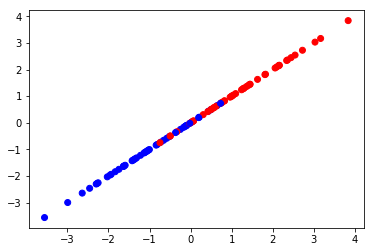

In [8]:
colors = ListedColormap(['red', 'blue'])
pylab.scatter(clf_data[:,0], clf_data[:,0], c = clf_target, cmap = colors)

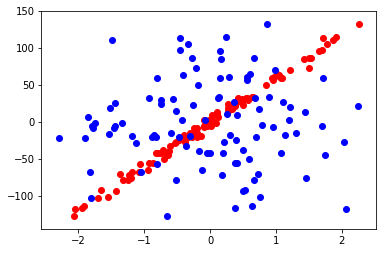

In [11]:
pylab.scatter(reg_data[:,1], reg_target, color = 'r')
pylab.scatter(reg_data[:,0], reg_target, color = 'b')

In [12]:
clf_train_data, clf_test_data, clf_train_labels, clf_test_labels = model_selection.train_test_split(clf_data, clf_target,
                                                                                     test_size = 0.3, random_state = 1)

In [13]:
reg_train_data, reg_test_data, reg_train_labels, reg_test_labels = cross_validation.train_test_split(reg_data, reg_target,
                                                                                     test_size = 0.3, random_state = 1)

### Метрики качества в задачах классификации

#### Обучение модели классификации

In [14]:
classifier = linear_model.SGDClassifier(loss = 'log', random_state = 1)

In [16]:
classifier.fit(clf_train_data, clf_train_labels)

D:\Users\Ksenia\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=1, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [17]:
predictions = classifier.predict(clf_test_data)

In [18]:
probability_predictions = classifier.predict_proba(clf_test_data)

In [20]:
print( clf_test_labels)

[1 0 0 1 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 0]


In [21]:
print( predictions)

[1 0 0 1 0 1 1 0 1 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 0]


In [22]:
print( probability_predictions)

[[  0.00000000e+00   1.00000000e+00]
 [  9.99999993e-01   6.61556341e-09]
 [  9.99988143e-01   1.18567026e-05]
 [  0.00000000e+00   1.00000000e+00]
 [  1.00000000e+00   4.62314295e-15]
 [  3.03803294e-09   9.99999997e-01]
 [  0.00000000e+00   1.00000000e+00]
 [  1.00000000e+00   5.05766731e-13]
 [  0.00000000e+00   1.00000000e+00]
 [  9.99999999e-01   5.18878464e-10]
 [  9.99999241e-01   7.58783839e-07]
 [  2.70446065e-04   9.99729554e-01]
 [  0.00000000e+00   1.00000000e+00]
 [  4.89202012e-11   1.00000000e+00]
 [  1.00000000e+00   8.62325525e-11]
 [  9.97365075e-01   2.63492515e-03]
 [  0.00000000e+00   1.00000000e+00]
 [  1.00000000e+00   1.30597714e-15]
 [  1.00000000e+00   3.28425090e-15]
 [  1.83630888e-13   1.00000000e+00]
 [  9.99999999e-01   5.19307103e-10]
 [  9.99999639e-01   3.60586359e-07]
 [  8.85166610e-01   1.14833390e-01]
 [  1.00000000e+00   7.21139609e-14]
 [  9.99999415e-01   5.85346707e-07]
 [  9.86697401e-01   1.33025990e-02]
 [  4.76887024e-02   9.52311298e-01]
 

#### accuracy

In [23]:
sum([1. if pair[0] == pair[1] else 0. for pair in zip(clf_test_labels, predictions)])/len(clf_test_labels)

0.96666666666666667

In [24]:
metrics.accuracy_score(clf_test_labels, predictions)

0.96666666666666667

#### confusion matrix

In [26]:
matrix = metrics.confusion_matrix(clf_test_labels, predictions)
print (matrix)

[[17  1]
 [ 0 12]]


In [27]:
sum([1 if pair[0] == pair[1] else 0 for pair in zip(clf_test_labels, predictions)])

29

In [28]:
matrix.diagonal().sum()

29

#### precision 

In [29]:
metrics.precision_score(clf_test_labels, predictions, pos_label = 0)

1.0

In [30]:
metrics.precision_score(clf_test_labels, predictions)

0.92307692307692313

#### recall

In [31]:
metrics.recall_score(clf_test_labels, predictions, pos_label = 0)

0.94444444444444442

In [32]:
metrics.recall_score(clf_test_labels, predictions)

1.0

#### f1

In [33]:
metrics.f1_score(clf_test_labels, predictions, pos_label = 0)

0.97142857142857142

In [34]:
metrics.f1_score(clf_test_labels, predictions)

0.96000000000000008

#### classification report

In [36]:
print( metrics.classification_report(clf_test_labels, predictions))

             precision    recall  f1-score   support

          0       1.00      0.94      0.97        18
          1       0.92      1.00      0.96        12

avg / total       0.97      0.97      0.97        30



#### ROC curve

In [37]:
fpr, tpr, _ = metrics.roc_curve(clf_test_labels, probability_predictions[:,1])

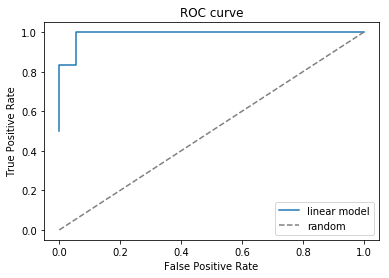

In [38]:
pylab.plot(fpr, tpr, label = 'linear model')
pylab.plot([0, 1], [0, 1], '--', color = 'grey', label = 'random')
pylab.xlim([-0.05, 1.05])
pylab.ylim([-0.05, 1.05])
pylab.xlabel('False Positive Rate')
pylab.ylabel('True Positive Rate')
pylab.title('ROC curve')
pylab.legend(loc = "lower right")

#### ROC AUC

In [39]:
metrics.roc_auc_score(clf_test_labels, predictions)

0.97222222222222221

In [40]:
metrics.roc_auc_score(clf_test_labels, probability_predictions[:,1])

0.9907407407407407

#### PR AUC

In [41]:
metrics.average_precision_score(clf_test_labels, predictions)

0.92307692307692313

#### log_loss

In [42]:
metrics.log_loss(clf_test_labels, probability_predictions[:,1])

0.28012062447668079

### Метрики качества в задачах регрессии

#### Обучение регрессионной модели 

In [49]:
regressor = linear_model.SGDRegressor(random_state = 1, max_iter = 100, tol=1e-8)

In [50]:
regressor.fit(reg_train_data, reg_train_labels)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=100, n_iter=None, penalty='l2',
       power_t=0.25, random_state=1, shuffle=True, tol=1e-08, verbose=0,
       warm_start=False)

In [51]:
reg_predictions = regressor.predict(reg_test_data)

In [53]:
print( reg_test_labels)

[   2.67799047    7.06525927  -56.43389936   10.08001896  -22.46817716
  -19.27471232   59.44372825  -21.60494574   32.54682713  -41.89798772
  -18.16390935   32.75688783   31.04095773    2.39589626   -5.04783924
  -70.20925097   86.69034305   18.50402992   32.31573461 -101.81138022
   15.14628858   29.49813932   97.282674     25.88034991  -41.63332253
  -92.11198201   86.7177122     2.13250832  -20.24967575  -27.32511755]


In [54]:
print (reg_predictions)

[  -1.13246149    6.7736406   -51.83796126    5.57569752  -24.1699092
   -8.23782283   64.2250831   -22.06066215   32.09523995  -40.43663313
  -17.57068622   32.52047328   28.56373406   -6.21687013   -2.90663393
  -81.91830627   88.6158914    16.10976794   24.40506098  -92.99999304
   15.66750338   33.44607289  100.1034759    23.05530037  -44.69149156
  -98.60069474   90.37862825    0.96698228  -16.54355132  -23.70824291]


#### mean absolute error

In [55]:
metrics.mean_absolute_error(reg_test_labels, reg_predictions)

3.7238015662537292

#### mean squared error

In [56]:
metrics.mean_squared_error(reg_test_labels, reg_predictions)

23.434443297917792

#### root mean squared error

In [57]:
sqrt(metrics.mean_squared_error(reg_test_labels, reg_predictions))

4.8409134776318608

#### r2 score

In [58]:
metrics.r2_score(reg_test_labels, reg_predictions)

0.9896190538396834